In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Importing the necessary libraries
import pandas as pd # for reading and manipulating dataframes
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for building visualizations
import seaborn as sns # for building visualizations
import warnings

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Saving `Id` column of the test set in a list
id_column = list(test['Id'])
# Dropping the `Id` column
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [7]:
# Extracting numerical features
train_num = train.select_dtypes(include='number')
test_num = test.select_dtypes(include='number')

train_num.info()
test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

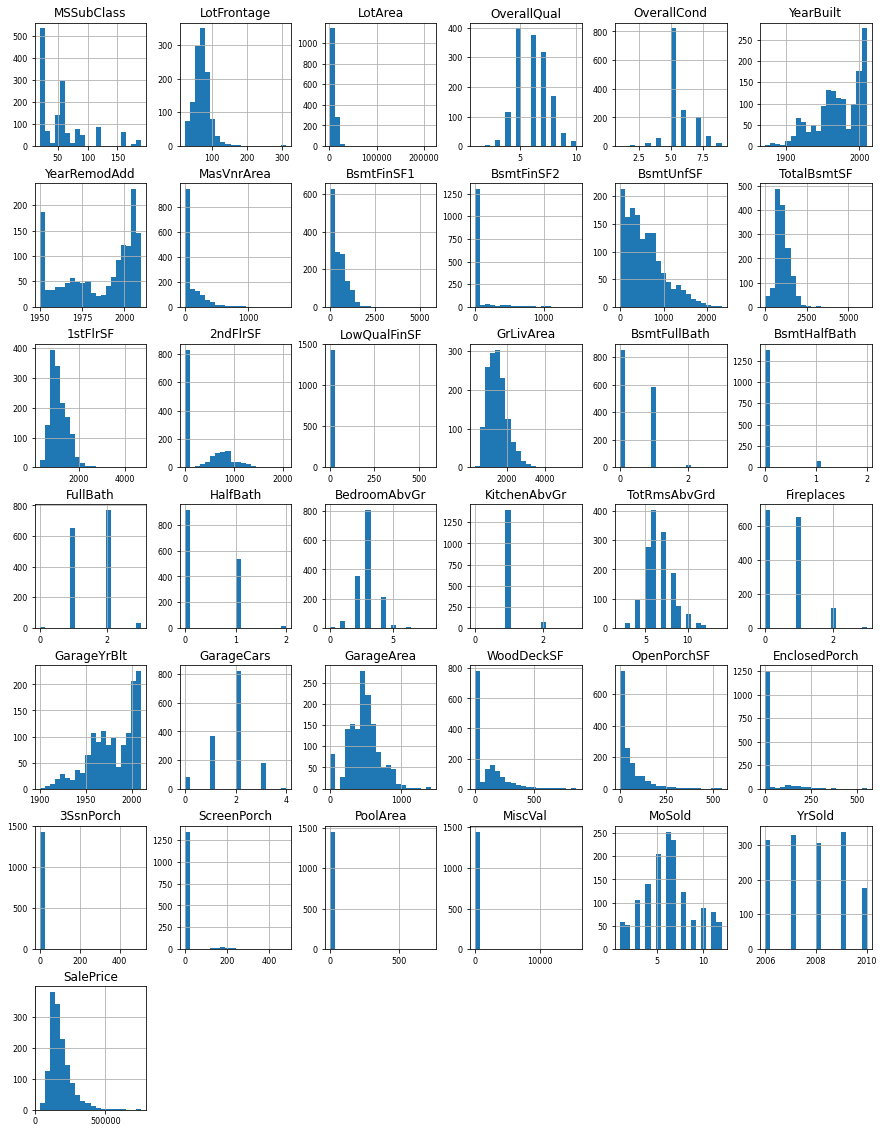

In [8]:
# Figure out the distribution of training set features
train_num.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8)

plt.show()

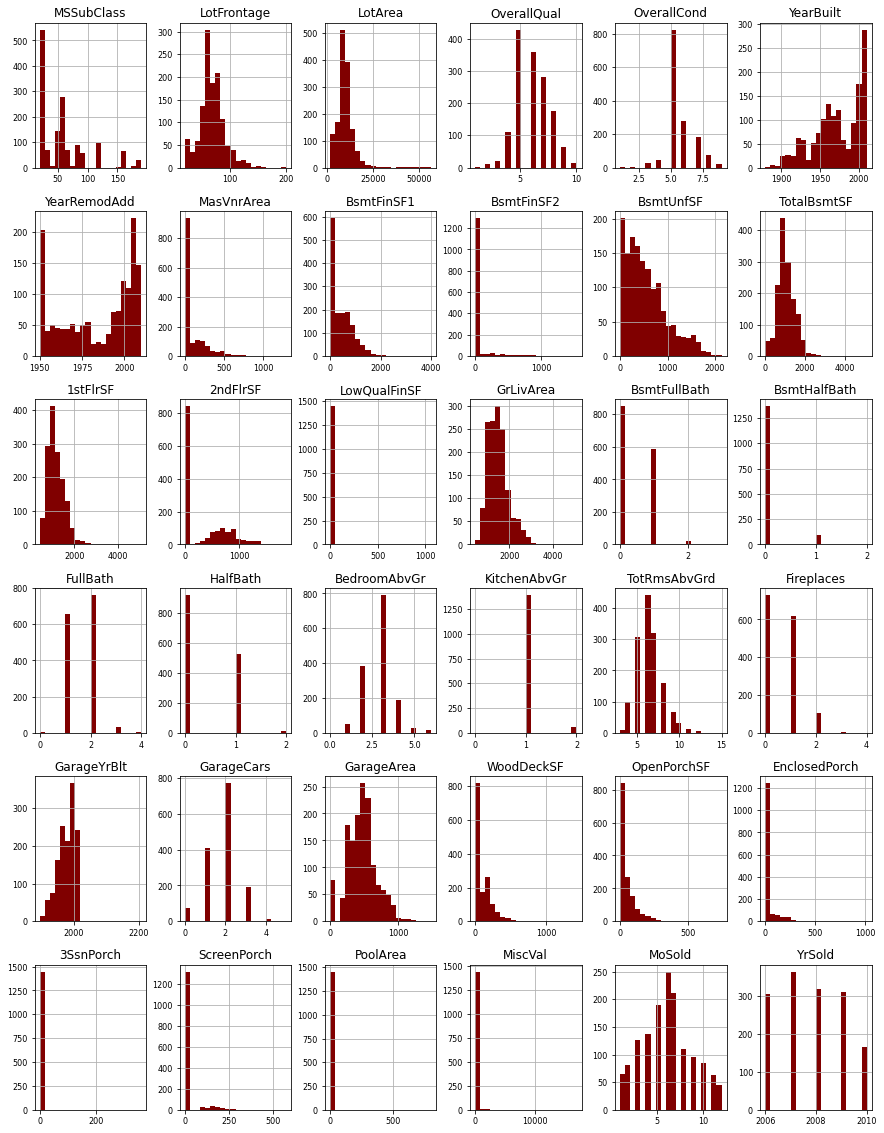

In [9]:
# Figure out the distribution of testing set features
test_num.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8, color='maroon')

plt.show()

In [10]:
# Detection of constant and quasi-constant features
from sklearn.feature_selection import VarianceThreshold

# Find the constant variance features
sel_const = VarianceThreshold(threshold=0)
# Find the quasi-constant variance features (with 95% of the same data)
sel_qsi_const = VarianceThreshold(threshold=0.05)

sel_const.fit(train_num)
sel_qsi_const.fit(train_num)

# Get the retained features from the feature selection process
ret_const = sel_const.get_support()
ret_qsi_const = sel_qsi_const.get_support()

# Return the columns that did not meet the threshold
const_columns = [col for col in train_num.columns if col not in\
               train_num.columns[ret_const]]
qsi_const_columns = [col for col in train_num.columns if col not\
                     in train_num.columns[ret_qsi_const]]

print(f"Number of features that are retained\
 after constant variance check: {sum(ret_const)}")
print(f"Number of features that are retained\
 after quasi_constant variance check: {sum(ret_qsi_const)}")
print(f"The variables that have about 95% of constant\
 values are: {qsi_const_columns}")

Number of features that are retained after constant variance check: 37
Number of features that are retained after quasi_constant variance check: 36
The variables that have about 95% of constant values are: ['KitchenAbvGr']


In [11]:
sel_const.fit(test_num)
sel_qsi_const.fit(test_num)

# Get the retained features from the feature selection process
ret_const_test = sel_const.get_support()
ret_qsi_const_test = sel_qsi_const.get_support()

# Return the columns that did not meet the threshold
const_columns_test = [col for col in test_num.columns if col not in\
               test_num.columns[ret_const_test]]
qsi_const_columns_test = [col for col in test_num.columns if col not\
                     in test_num.columns[ret_qsi_const_test]]

print(f"Number of features that are retained\
 after constant variance check: {sum(ret_const_test)}")
print(f"Number of features that are retained\
 after quasi_constant variance check: {sum(ret_qsi_const_test)}")
print(f"The variables that have about 95% of constant\
 values are: {qsi_const_columns_test}")

Number of features that are retained after constant variance check: 36
Number of features that are retained after quasi_constant variance check: 35
The variables that have about 95% of constant values are: ['KitchenAbvGr']


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


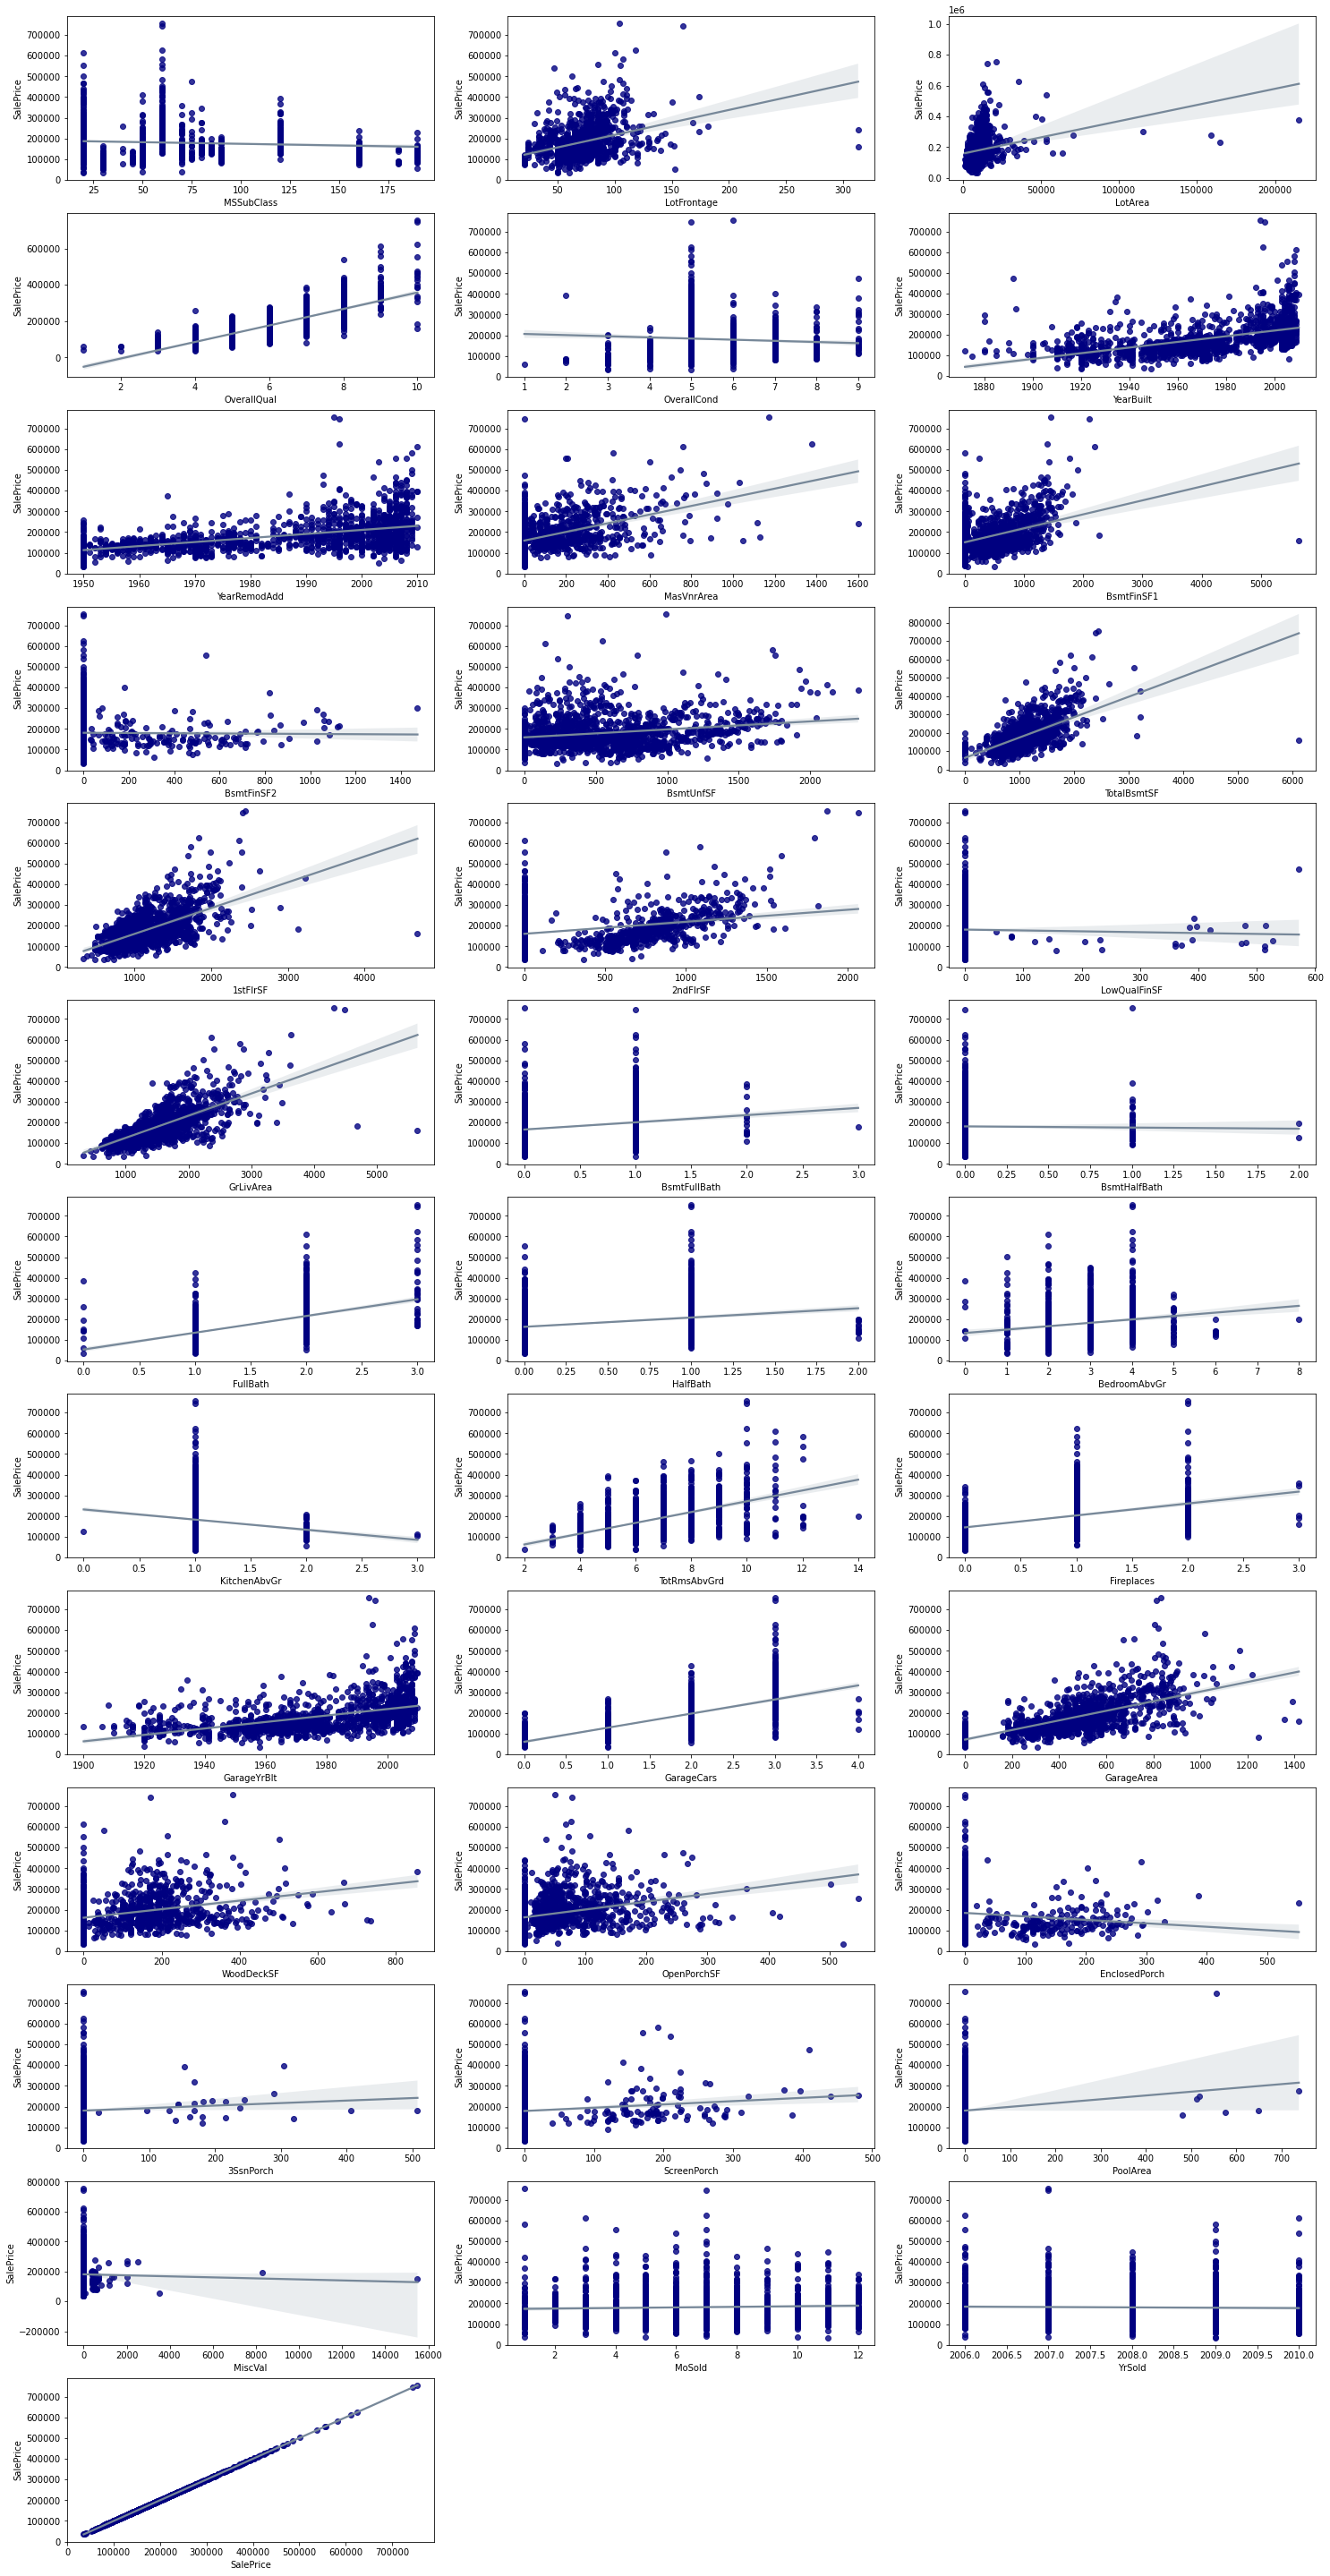

In [12]:
# Figure out the correlation among variables
count=1
plt.subplots(figsize=(25, 60))
for i in train_num.columns:
    plt.subplot(15,3,count)
    sns.regplot(train_num[i],train_num['SalePrice'],\
               scatter_kws={'color':'navy'},\
               line_kws={'color': 'lightslategrey'})
    count+=1

plt.show()

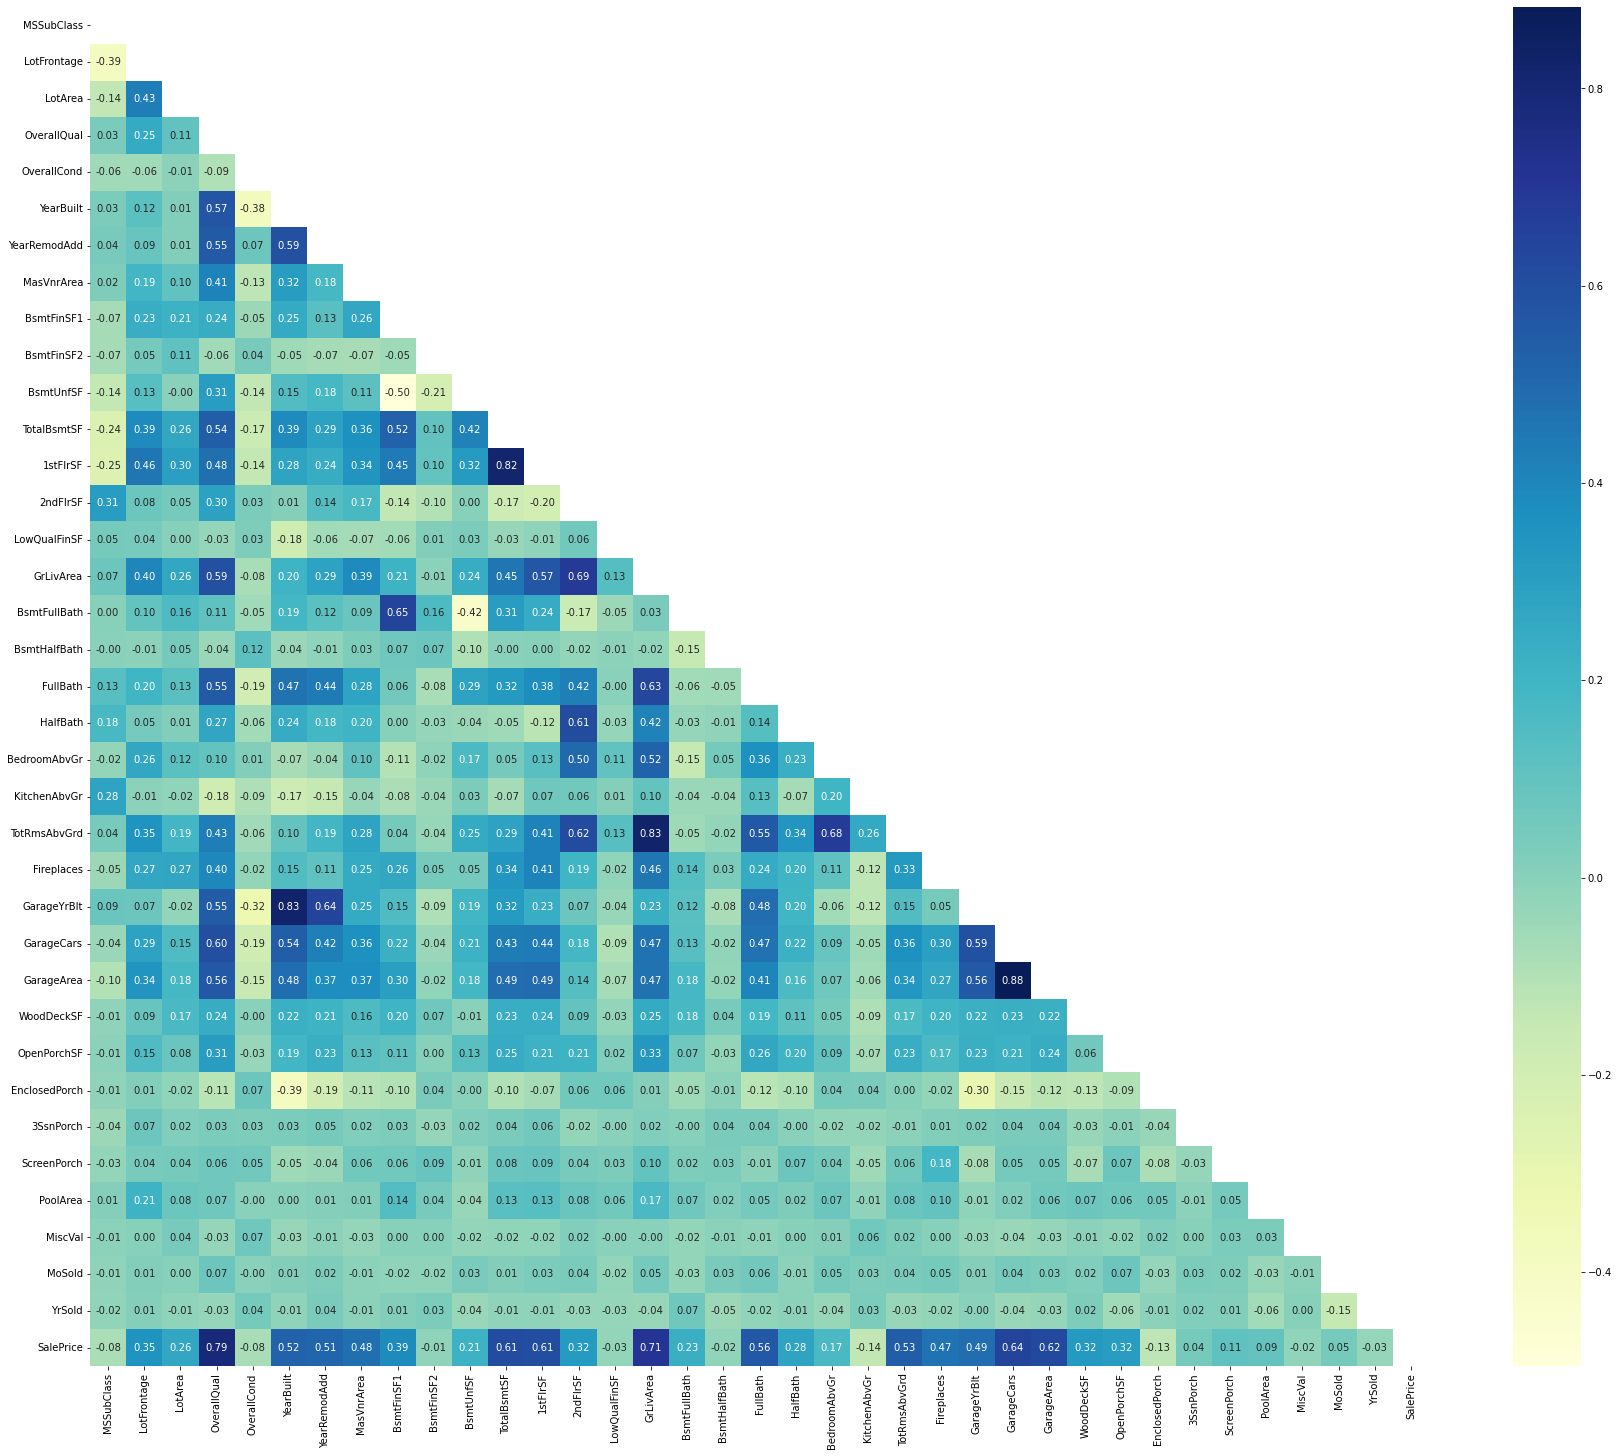

In [13]:
# Modifying the figure size
plt.figure(figsize=(30,25))
# Calculation of correlation among variables
corr_matrix = train_num.corr()
# Masking the upper triangle for the heatmap since it shows the same values of correlation
mask_upp = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plotting correlation heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True, fmt='.2f',\
            mask = mask_upp)
  
# displaying heatmap
plt.show()

In [14]:
# Highly correlated features with other features (Multicollinear features)
multicol_features = ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
# Dropping the multicolinear features
train_num = train_num.drop(multicol_features, axis = 1)
test_num =  test_num.drop(multicol_features, axis = 1)

In [15]:
df_num_corr = train_num.corr()["SalePrice"][:-1]
strong_features = list(abs(df_num_corr[df_num_corr >= 0.7]).index)
moderate_features = list(abs(df_num_corr[(df_num_corr >= 0.4) & (df_num_corr < 0.7)]).index)
weak_features = list(abs(df_num_corr[(df_num_corr >= 0.1) &\
                        (df_num_corr < 0.4)]).index)

list_keep = strong_features + weak_features + moderate_features
list_keep.append('SalePrice')

train_num = train_num.loc[:,list_keep]
test_num = test_num.loc[:,list_keep[:-1]]

In [16]:
train_num

,OverallQual,GrLivArea,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,...,OpenPorchSF,ScreenPorch,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,SalePrice
0,7,1710,65.0,8450,706,150,854,1,1,3,...,61,0,2003,2003,196.0,856,2,0,2,208500
1,6,1262,80.0,9600,978,284,0,0,0,3,...,0,0,1976,1976,0.0,1262,2,1,2,181500
2,7,1786,68.0,11250,486,434,866,1,1,3,...,42,0,2001,2002,162.0,920,2,1,2,223500
3,7,1717,60.0,9550,216,540,756,1,0,3,...,35,0,1915,1970,0.0,756,1,1,3,140000
4,8,2198,84.0,14260,655,490,1053,1,1,4,...,84,0,2000,2000,350.0,1145,2,1,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,62.0,7917,0,953,694,0,1,3,...,40,0,1999,2000,0.0,953,2,1,2,175000
1456,6,2073,85.0,13175,790,589,0,1,0,3,...,0,0,1978,1988,119.0,1542,2,2,2,210000
1457,7,2340,66.0,9042,275,877,1152,0,0,4,...,60,0,1941,2006,0.0,1152,2,2,1,266500
1458,5,1078,68.0,9717,49,0,0,1,0,2,...,0,0,1950,1996,0.0,1078,1,0,1,142125


In [17]:
col_nan_train = train_num.loc[:, train_num.isnull().any()].columns
col_nan_test = test_num.loc[:, test_num.isnull().any()].columns

print(col_nan_train)
print(col_nan_test)

Index(['LotFrontage', 'MasVnrArea'], dtype='object')
Index(['LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'MasVnrArea',
       'TotalBsmtSF', 'GarageCars'],
      dtype='object')


       columns  percent_nan
0  LotFrontage        17.74
1   MasVnrArea         0.55


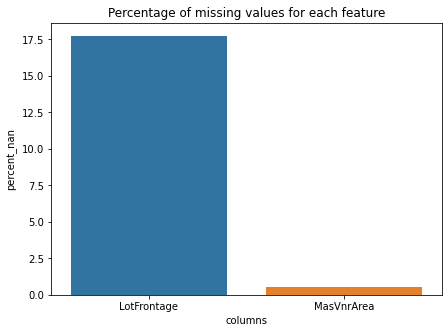

In [18]:
# Building a dataframe for featues with missing values
cols_train = []
percent_nan_train = []

for i in col_nan_train:
    cols_train.append(i)
    percent_nan_train.append(round(train_num[i].isnull().sum() * 100 /\
                       len(train_num), 2))

missing_df_train = pd.DataFrame(np.array(cols_train),\
                                columns=["columns"])
missing_df_train['percent_nan'] = np.array(percent_nan_train)
print(missing_df_train)
# Visualizing the NaN values 
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_train, x='columns', y = 'percent_nan')
plt.title('Percentage of missing values for each feature')
plt.show()

        columns  percent_nan
0   LotFrontage        15.56
1    BsmtFinSF1         0.07
2     BsmtUnfSF         0.07
3  BsmtFullBath         0.14
4    MasVnrArea         1.03
5   TotalBsmtSF         0.07
6    GarageCars         0.07


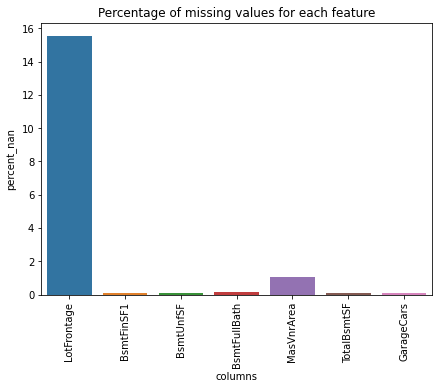

In [19]:
cols_test = []
percent_nan_test = []

for i in col_nan_test:
    cols_test.append(i)
    percent_nan_test.append(round(test_num[i].isnull().sum() * 100 /len(test_num), 2))
    
missing_df_test = pd.DataFrame(np.array(cols_test),\
                                columns=["columns"])
missing_df_test['percent_nan'] = np.array(percent_nan_test)

print(missing_df_test)
# Visualizing the NaN values
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_test, x='columns', y = 'percent_nan')
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation = 90)
plt.show()

In [20]:
# Importing the library for imputation method
from sklearn.impute import SimpleImputer
# Initiating the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
list_missing_train = ['LotFrontage', 'MasVnrArea']
# Filling the missing values with the median of the column
df_train_impute = pd.DataFrame(imputer.fit_transform(train_num),\
                              columns = train_num.columns)

In [21]:
# Filling the missing values with the median of the column
list_missing_test = ['LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath','MasVnrArea', 'TotalBsmtSF', 'GarageCars']
df_test_impute = pd.DataFrame(imputer.fit_transform(test_num),\
                              columns = test_num.columns)

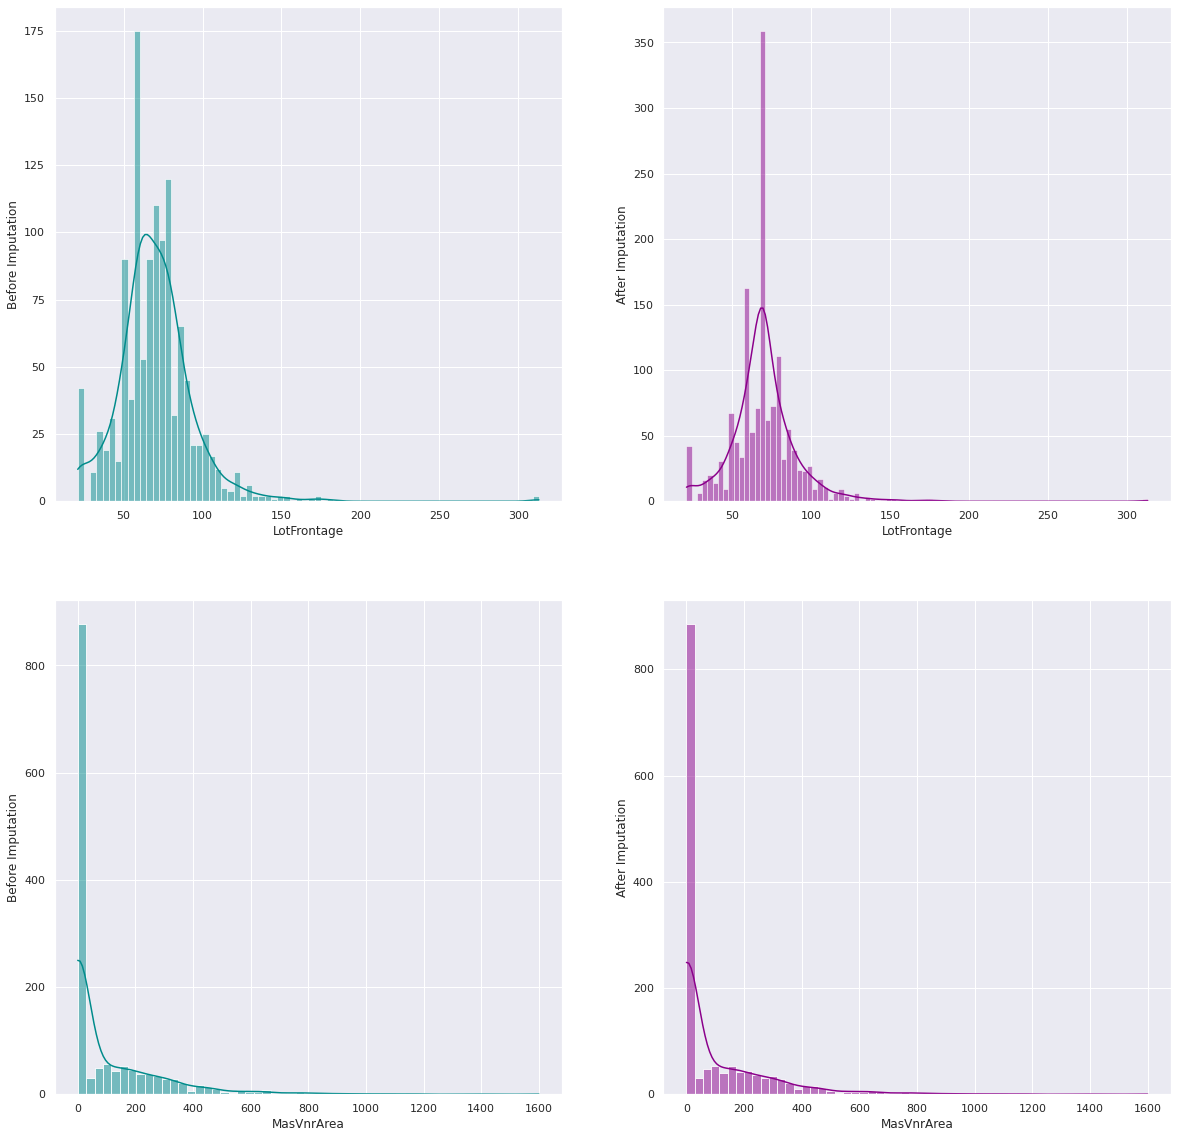

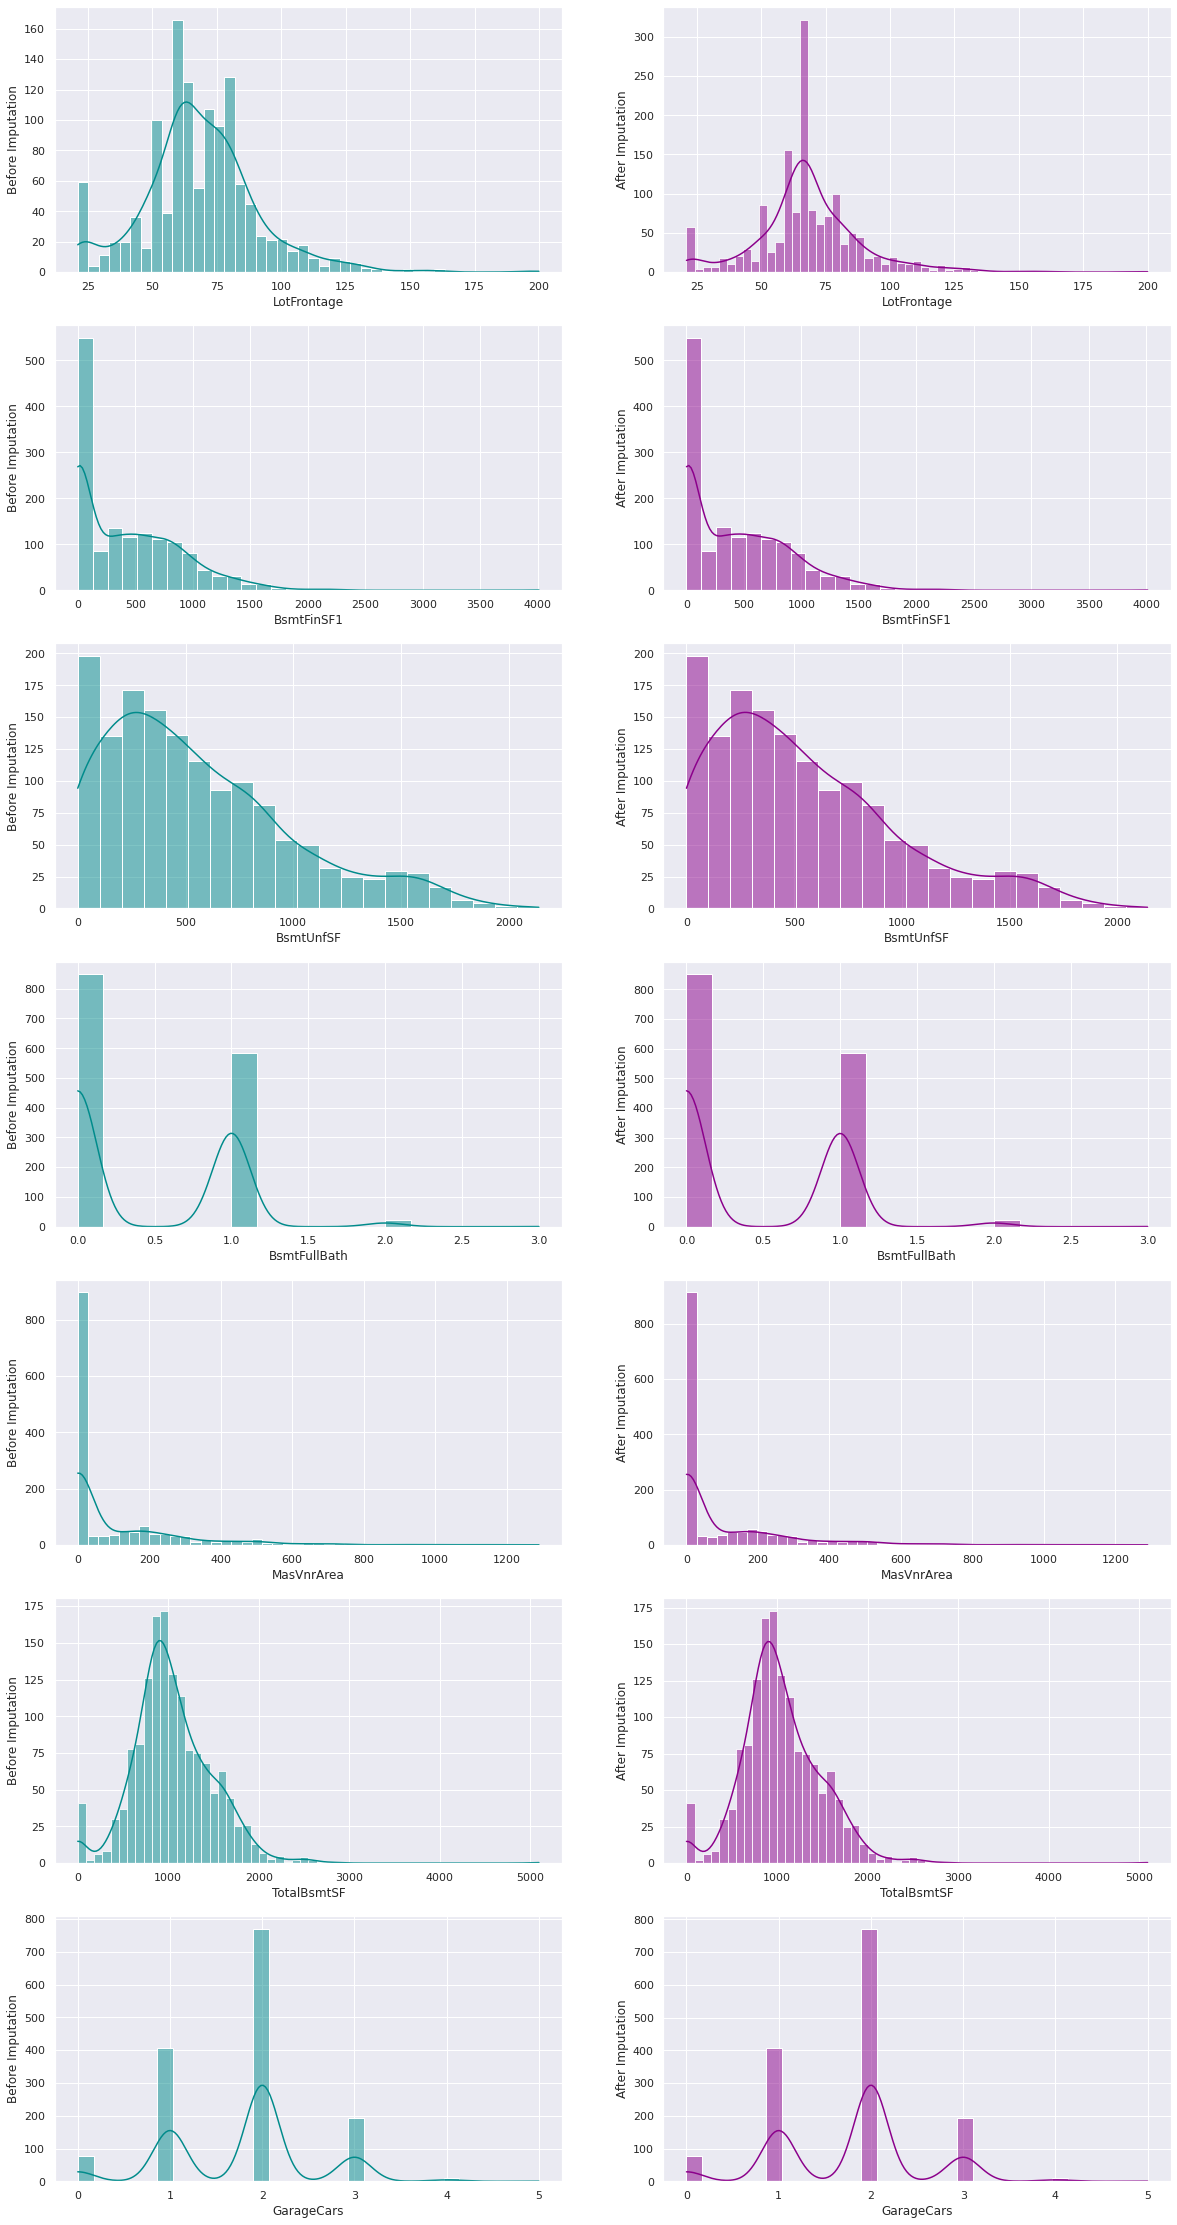

In [22]:
# Visualizing the distribution before and after imputation
sns.set(rc={"figure.figsize":(20, 20)})
fig, axes = plt.subplots(2, 2)
for col, fig_row in zip(list_missing_train,[0, 1]):
    before_impute = sns.histplot(ax=axes[fig_row,0],\
                                 x=train_num[col],\
                                 kde=True, color='darkcyan')
    before_impute.set(ylabel='Before Imputation')
    after_impute = sns.histplot(ax=axes[fig_row,1],\
                                 x=df_train_impute[col],\
                                 kde=True, color='darkmagenta')
    after_impute.set(ylabel='After Imputation')
# Visualizing the distribution before and after imputation
sns.set(rc={"figure.figsize":(20, 40)})
fig, axes = plt.subplots(7, 2)   
for col, fig_row in zip(list_missing_test,range(0, 7)):
    before_impute = sns.histplot(ax=axes[fig_row,0],\
                                 x=test_num[col],\
                                 kde=True, color='darkcyan')
    before_impute.set(ylabel='Before Imputation')
    after_impute = sns.histplot(ax=axes[fig_row,1],\
                                 x=df_test_impute[col],\
                                 kde=True, color='darkmagenta')
    after_impute.set(ylabel='After Imputation')

In [23]:
# Dropping the `LotFrontage` feature from both datasets
df_train_impute.drop('LotFrontage', axis=1, inplace=True)
df_test_impute.drop('LotFrontage', axis=1, inplace=True)